In [1]:
#trying to predict the gender of a person with deeper recurrent neural networks


#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/twitter-user-gender-classification/gender-classifier-DFE-791531.csv',encoding='latin-1')
#showing the dataset
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [3]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [4]:
#checking for missing values in the dataset
df.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7485
user_timezone             7798
dtype: int64

In [5]:
#Preprocessing the dataset
#getting precentage of missing values in the dataset
#the more missing values the more we need to fill it with fabricated data
df.isna().mean()

_unit_id                 0.000000
_golden                  0.000000
_unit_state              0.000000
_trusted_judgments       0.000000
_last_judgment_at        0.002494
gender                   0.004838
gender:confidence        0.001297
profile_yn               0.000000
profile_yn:confidence    0.000000
created                  0.000000
description              0.186733
fav_number               0.000000
gender_gold              0.997506
link_color               0.000000
name                     0.000000
profile_yn_gold          0.997506
profileimage             0.000000
retweet_count            0.000000
sidebar_color            0.000000
text                     0.000000
tweet_coord              0.992070
tweet_count              0.000000
tweet_created            0.000000
tweet_id                 0.000000
tweet_location           0.373317
user_timezone            0.388928
dtype: float64

In [6]:
df.loc[df['gender'].isna(),:].index

Index([  109,   137,   496,   582,   679,   749,  1179,  1664,  1698,  1963,
        2118,  2245,  2272,  2377,  2537,  2596,  2717,  2751,  2765,  2886,
        2980,  3190,  3195,  3219,  3337,  3381,  3553,  3791,  3942,  4008,
        4072,  4222,  4529,  4641,  4749,  4978,  5073,  6023,  6279,  6305,
        6426,  6700,  6988,  7436,  7823,  7985,  8202,  8432,  8706,  8877,
        9198,  9282,  9288,  9326,  9804,  9923, 10252, 10293, 10320, 10386,
       10605, 11019, 11080, 11161, 11273, 11459, 11577, 12103, 12889, 13007,
       14045, 15018, 15243, 15270, 15428, 15450, 15740, 15921, 16208, 16365,
       16640, 16886, 16991, 17114, 17163, 18001, 18048, 18063, 18070, 18122,
       18136, 18303, 18524, 18700, 18840, 19773, 19842],
      dtype='int64')

In [7]:
df.loc[:,df.isna().mean()>0.30].columns

Index(['gender_gold', 'profile_yn_gold', 'tweet_coord', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [8]:
def get_sequences(text,vocab_length):
    #creating instance of Tokenizer object
    tokenizer=Tokenizer(num_words=vocab_length)
    tokenizer.fit_on_texts(text)
    sequences=tokenizer.texts_to_sequences(text)
    max_sequence_length=np.max([len(sequence) for sequence in sequences])
    sequences=pad_sequences(sequences,maxlen=max_sequence_length,padding='post')
    return sequences

In [9]:
#creating the preprocesing input
def preprocess_inputs(df):
    #creating copy of the dataset
    df=df.copy()
    #dropping unnecessry columns
    
    unnecessary_columns=['_unit_id','name','profileimage','tweet_id']
    df=df.drop(unnecessary_columns,axis=1)
    #splitting the data between target and features
    
    
    #changing the unknown value to nan value
    df['gender']=df['gender'].replace({'unknown':np.NaN})
    
    
    #dropping the rows with missing values in gender column
    df=df.drop(df.loc[df['gender'].isna(),:].index,axis=0).reset_index(drop=True)
    
    #dropping the column with missing value more than .30 percent
    
    df=df.drop(df.loc[:,df.isna().mean()>0.30].columns,axis=1)
    
    #dropping 50 rows with missing values in date column
    
    
    judgement_nas=df[df['_last_judgment_at'].isna()].index
    df=df.drop(judgement_nas,axis=0).reset_index(drop=True)
    
    #encoding missing value in description column as empty string
    
    df['description']=df['description'].fillna('')
    
    
    #extracting the year,month and day from date column
    
    
    date_column=['_last_judgment_at','tweet_created','created']
    
    for column in date_column:
        df[column]=pd.to_datetime(df[column])
        
        df[column+'_year']=df[column].dt.year
        df[column+'_month']=df[column].dt.month
        df[column+'_day']=df[column].dt.day
        df[column+'_hour']=df[column].dt.hour
        df[column+'_minute']=df[column].dt.minute

        df=df.drop(column,axis=1)
    
    
    #getting sequence data for description and text
    
    
    desc=get_sequences(df['description'],vocab_length=20000)
    tweet=get_sequences(df['text'],vocab_length=20000)
    
    
    
    df=df.drop(['description','text'],axis=1)
    
    for column in df.columns:
        if len(df[column].unique())==1:
            df=df.drop(column,axis=1)
    
    def hex_to_decimal(h):
        try:
            return int(h,16)
        except:
            return 0
    def get_rgb(colors):
        colors = colors.apply(lambda x: x.lstrip('#'))
        r=colors.apply(lambda x:hex_to_decimal(x[0:2]))
        g=colors.apply(lambda x:hex_to_decimal(x[2:4]))
        b=colors.apply(lambda x:hex_to_decimal(x[4:6]))
        return r,g,b
    
    
    #Enoding color code with r,g,b values
    
    df['link_red'],df['link_green'],df['link_blue']=get_rgb(df['link_color'])
    df['side_red'],df['side_green'],df['side_blue']=get_rgb(df['sidebar_color'])
    
    df=df.drop(['link_color','sidebar_color'],axis=1)
    
    
    gender_mapping={'male':1, 'female':0, 'brand':2}
    
    
    df['gender']=df['gender'].replace(gender_mapping)
    

    y=df['gender']
    x=df.drop('gender',axis=1)
    scaler=StandardScaler()
    
    
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)
    return x,y,desc,tweet

In [10]:
df['gender'].unique()

array(['male', 'female', 'brand', 'unknown', nan], dtype=object)

In [11]:
x,y,desc,tweet=preprocess_inputs(df)


/tmp/ipykernel_30/2671828311.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])
/tmp/ipykernel_30/2671828311.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])
/tmp/ipykernel_30/2671828311.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column]=pd.to_datetime(df[column])
/tmp/ipykernel_30/2671828311.py:89: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

In [12]:
x

,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,_last_judgment_at_day,_last_judgment_at_hour,_last_judgment_at_minute,tweet_created_hour,tweet_created_minute,...,created_month,created_day,created_hour,created_minute,link_red,link_green,link_blue,side_red,side_green,side_blue
0,0.572304,0.127711,-0.353856,-0.030197,0.601703,-0.998086,1.038621,-0.328199,-1.006515,1.024257,...,1.741746,-1.247951,-1.869971,1.078077,-0.652618,1.471536,0.668960,1.033061,0.820675,0.726157
1,0.572304,0.127711,-0.348401,-0.030197,-0.265987,-0.998086,1.038621,0.012173,-1.006515,1.024257,...,1.129840,-1.708550,0.166174,1.252523,-0.744239,0.267859,0.474240,0.342076,0.479470,0.547354
2,-1.377855,0.127711,0.263524,0.335319,-0.281531,-0.998086,1.038621,0.182358,-1.006515,1.024257,...,1.435793,1.400491,-0.173183,0.031399,1.214150,1.277394,0.668960,0.342076,0.479470,0.547354
3,0.572304,0.127711,-0.337651,-0.030197,-0.314430,-0.998086,1.038621,-1.122398,-1.006515,1.024257,...,-0.093971,-0.557053,1.693283,0.554738,-0.744239,0.267859,0.474240,0.342076,0.479470,0.547354
4,0.572304,0.127711,2.639827,-0.030197,-0.064846,1.001918,-0.964719,-0.838755,-1.006515,1.024257,...,-0.705877,0.018695,0.166174,-0.375642,-0.068537,0.578485,0.988857,-1.763781,-1.815909,-1.806887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,0.572304,0.127711,2.360338,0.335319,-0.083894,-0.998086,1.038621,-1.462769,0.993527,-1.125610,...,-1.623736,0.939893,-0.173183,1.485118,1.214150,1.277394,0.668960,-1.763781,-1.815909,-1.806887
18782,0.572304,0.127711,-0.156352,-0.030197,-0.235419,1.001918,-0.964719,0.579458,0.993527,-1.125610,...,1.741746,0.364144,0.166174,1.426969,-0.744239,0.267859,0.474240,0.342076,0.479470,0.547354
18783,0.572304,0.127711,-0.205046,-0.030197,-0.281338,1.001918,-1.055780,-1.519498,0.993527,-1.125610,...,-0.705877,-0.096455,1.184247,-0.840832,0.423923,-0.974647,-1.556412,-1.763781,-1.815909,-1.806887
18784,-1.396345,0.127711,-0.180579,-0.030197,-0.311512,-0.998086,0.947560,-0.158013,0.993527,-1.125610,...,-0.705877,-1.132802,0.166174,0.787333,-0.686976,1.277394,0.808045,-1.763781,-1.815909,-1.806887


# Train Test Split

In [13]:
x_train,x_test,description_train,description_test,tweet_train,tweet_test,y_train,y_test=train_test_split(x,desc,tweet,y,train_size=0.7,random_state=123)

print(x_train.shape)
print(x_test.shape)
print(description_train.shape)
print(description_test.shape)
print(tweet_train.shape)
print(tweet_test.shape)
print(y_train.shape)
print(y_test.shape)

(13150, 21)
(5636, 21)
(13150, 62)
(5636, 62)
(13150, 104)
(5636, 104)
(13150,)
(5636,)


# Constructing the Model

In [14]:
x_inputs=tf.keras.Input(shape=(x_train.shape[1],))
description_inputs=tf.keras.Input(shape=(description_train.shape[1],))
tweet_inputs=tf.keras.Input(shape=(tweet_train.shape[1],))

x_dense1=tf.keras.layers.Dense(256,activation='relu')(x_inputs)
x_dense2=tf.keras.layers.Dense(256,activation='relu')(x_dense1)


desc_embedding=tf.keras.layers.Embedding(input_dim=20000,output_dim=256,input_length=desc.shape[1])(description_inputs)

desc_gru=tf.keras.layers.GRU(256,return_sequences=False)(desc_embedding)
desc_flatten=tf.keras.layers.Flatten()(desc_embedding)
desc_concat=tf.keras.layers.concatenate([desc_gru,desc_flatten])

    
tweet_embedding=tf.keras.layers.Embedding(input_dim=20000,output_dim=256,input_length=tweet.shape[1])(tweet_inputs)

tweet_gru=tf.keras.layers.GRU(256,return_sequences=False)(tweet_embedding)
tweet_flatten=tf.keras.layers.Flatten()(tweet_embedding)
tweet_concat=tf.keras.layers.concatenate([tweet_gru,tweet_flatten])


    

concat=tf.keras.layers.concatenate([x_dense2,desc_concat,tweet_concat])


outputs=tf.keras.layers.Dense(3,activation='softmax')(concat)

model=tf.keras.Model(inputs=[x_inputs,description_inputs,tweet_inputs],outputs=outputs)





model.summary()







/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 62)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 104)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 21)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 62, 256)   │  5,120,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 104, 256)  │  5,120,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │      5,632 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 256)       │    394,752 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 15872)     │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 256)       │    394,752 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 26624)     │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16128)     │          0 │ gru[0][0],        │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 26880)     │          0 │ gru_1[0][0],      │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 43264)     │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ concatenate[0][0… │
│                     │                   │            │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │    129,795 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,230,723 (42.84 MB)

 Trainable params: 11,230,723 (42.84 MB)

 Non-trainable params: 0 (0.00 B)

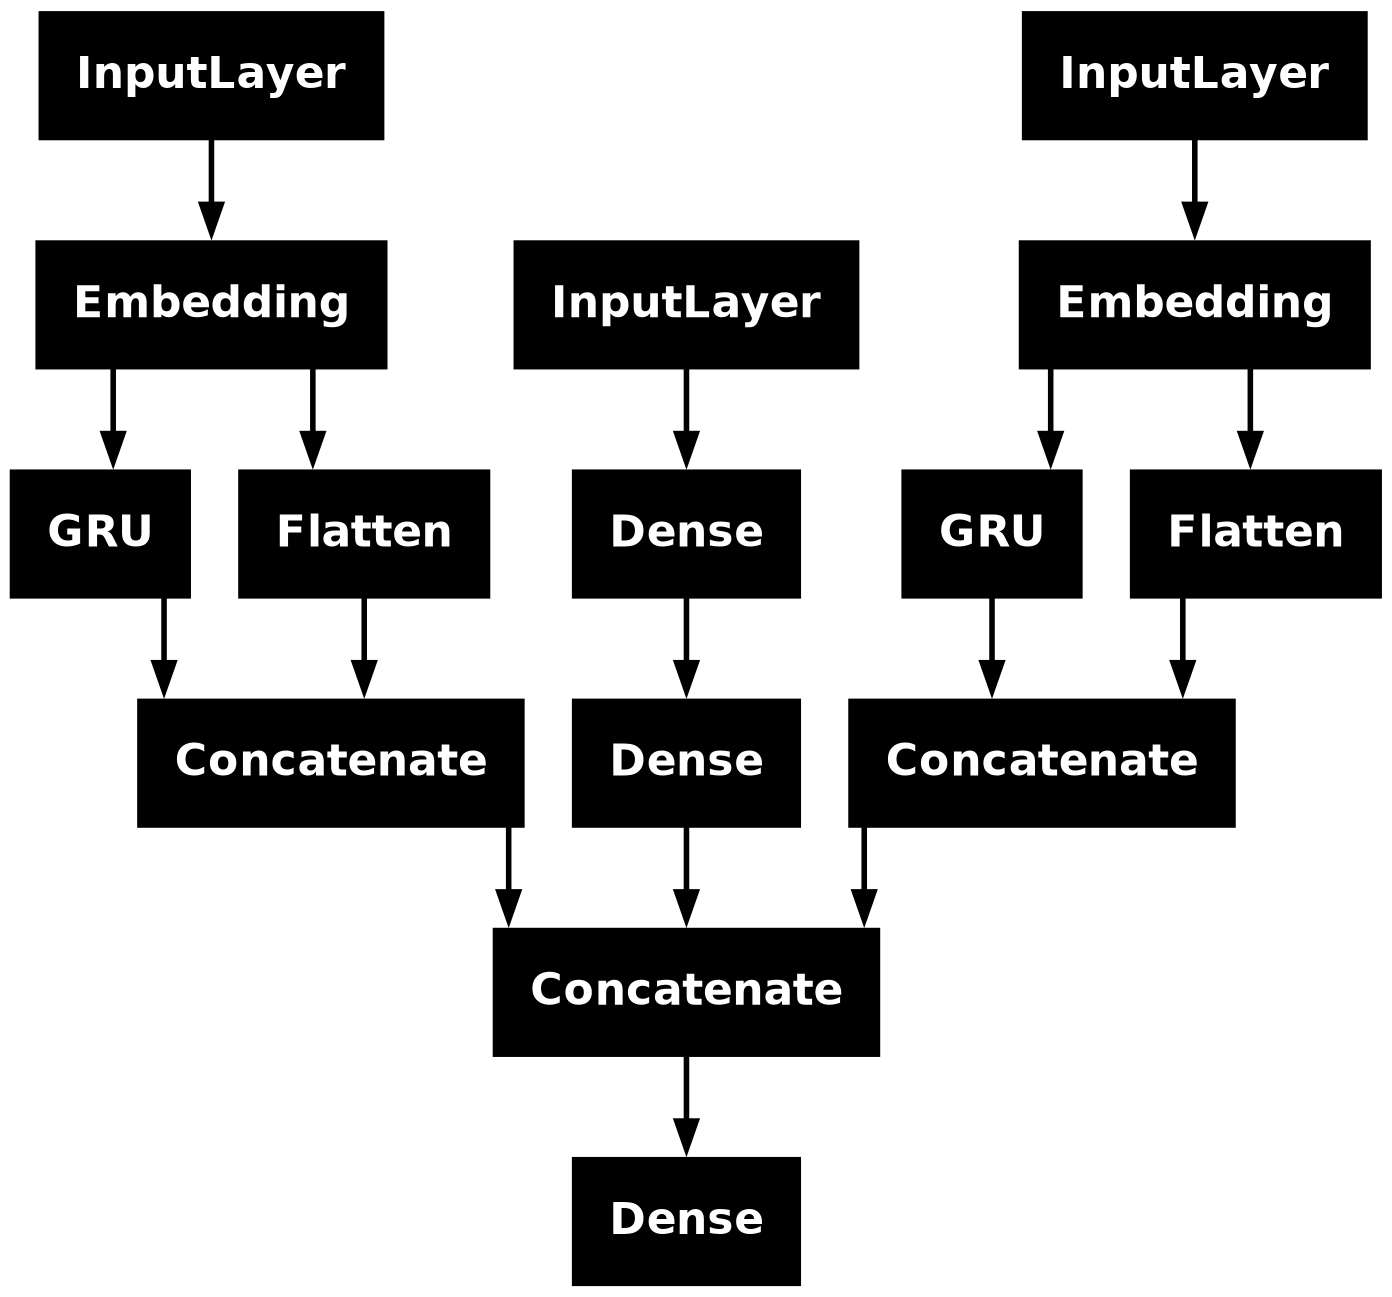

In [15]:
tf.keras.utils.plot_model(model)

# Training the Model

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 32
epochs = 3

history = model.fit([x_train, description_train, tweet_train], y_train,
                    validation_split=0.2,  # Fixed the typo here
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[
                       
                        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
                    ])


Epoch 1/3
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5076 - loss: 0.9519 - val_accuracy: 0.6479 - val_loss: 0.7583 - learning_rate: 0.0010
Epoch 2/3
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8806 - loss: 0.3949 - val_accuracy: 0.6570 - val_loss: 0.7884 - learning_rate: 0.0010
Epoch 3/3
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9807 - loss: 0.0982 - val_accuracy: 0.6392 - val_loss: 0.8653 - learning_rate: 0.0010


In [23]:
results=model.evaluate([x_test,description_test,tweet_test],y_test,verbose=0)
print(results)

[0.8572072982788086, 0.6451383829116821]


In [24]:
y_true=np.array(y_test)
y_pred=model.predict([x_test,description_test,tweet_test])
y_pred=map(lambda x:np.argmax(x),y_pred)
y_pred=np.array(list(y_pred))


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [25]:
y_pred

array([0, 2, 0, ..., 2, 1, 1])

In [26]:
y_true

array([0, 2, 0, ..., 2, 1, 1])

In [28]:
clr=classification_report(y_pred,y_true)
print(clr)

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1973
           1       0.61      0.55      0.58      2064
           2       0.70      0.80      0.74      1599

    accuracy                           0.65      5636
   macro avg       0.65      0.66      0.65      5636
weighted avg       0.64      0.65      0.64      5636



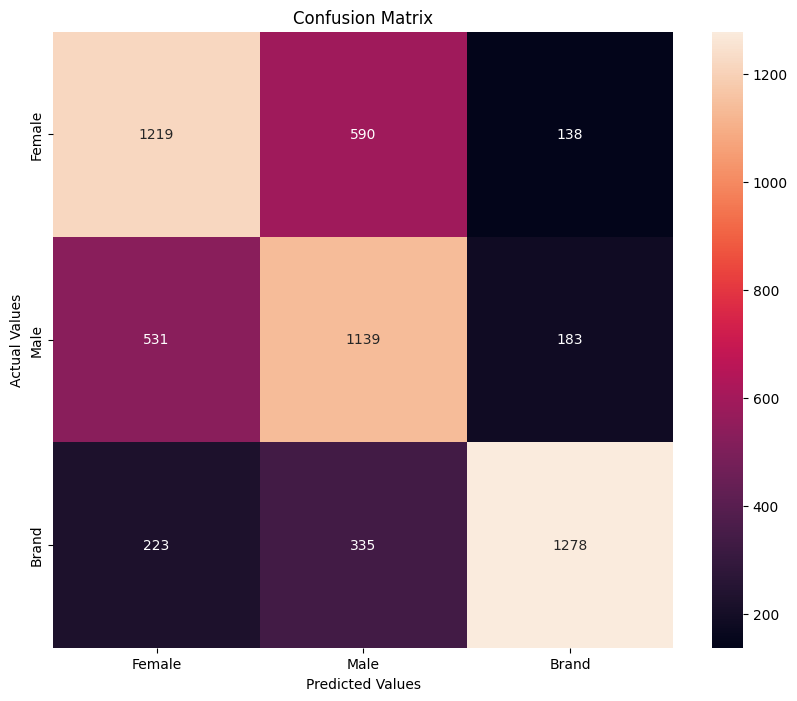

In [34]:
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='g',yticklabels=['Female','Male','Brand'],xticklabels=['Female','Male','Brand'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
x

In [ ]:
y.unique()

In [ ]:
x['_last_judgment_at_year'].unique()